#E05 : Numerical integration of ODEs, and application to the Leaky Integrate-and-Fire neuron model -- Homework
---

Based on the tutorial, we will use simulations of the LIF to check analytical results for the f-I curve that predicts the firing rate of the LIF as a funtion of the input current.

### Let us first plot the analytical solution for the firing rate 

The time from one spike to the next must be exactly the time it takes to reach the spike threshold when starting from the reset potential: $V(T)=V_{\rm threshold}$. Using the analytical solution for $V(t)$, with $V(t=0)=V_{\rm reset}$,  allows us to calculate the firing rate $f(I)$:

$$f(I) = \frac{1}{\tau_m} \left(\log\frac{E_L+I/g_L-V_{\rm reset}}{E_L+I/g_L-V_{\rm threshold}}\right)^{-1}$$


In [3]:
# some imports for the numerics to follow, you'll be familiar with these
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

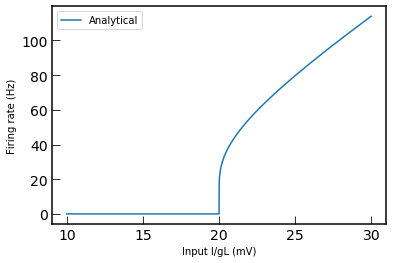

In [4]:
# define parameters
tau = 7.     # decay time constant, in ms
V0 = -70.    # initial voltage, in mV
EL = -50.    # resting potential, in mV
Vthreshold = -30. # mV
Vreset = -55.0    # mV

def fI_analytical(IgL):
    """Firing rate (in Hz) of the LIF as a function 
    of the effective input I/g_L."""
    # if the current is below a firing threshold,
    # the voltage does not reach threshold and the
    # firing rate is zero
    IgL_threshold = Vthreshold - EL
    if IgL <= IgL_threshold:
        return 0.0
    T_isi = tau * np.log((EL+IgL-Vreset)/(EL+IgL-Vthreshold))
    rate = 1000/T_isi # rate in Hz
    return rate

Ivals = np.arange(10., 30, 0.01)
rates_analytical = [fI_analytical(I) for I in Ivals]

fig, ax = plt.subplots()
ax.plot(Ivals, rates_analytical, label='Analytical')
ax.set_xlabel('Input I/gL (mV)')
ax.set_ylabel('Firing rate (Hz)')
ax.legend()

#### Homework questions:

1. Simulate the LIF for a duration of 1s, for the value of `IgL = 21.0` (use the code from the in-class tutorial from the **Simulation of a Leaky Integrate-and-Fire neuron** section). Plot the voltage dynamics. How many spikes do you count?
2. Repeat the simulation of the LIF for different values of the input, `Igl_vals = [17.5, 20.5, 21., 21.5, 22., 25.]`. Record each time the number of spikes. 
3. From the recorded spiketimes or number of spikes, calculate the firing rate for each of the above values of the input.
4. Plot your results for the firing rate obtained by simulations together with the analytical result for the firing rate (see above).

In [3]:
# Your code